In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path


In [ ]:
df_load = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(df_load.shape)

df_load = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(df_load.shape)

print(df_load.head())

print(df_load.customerID.nunique())

(7043, 21)
(7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovie

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

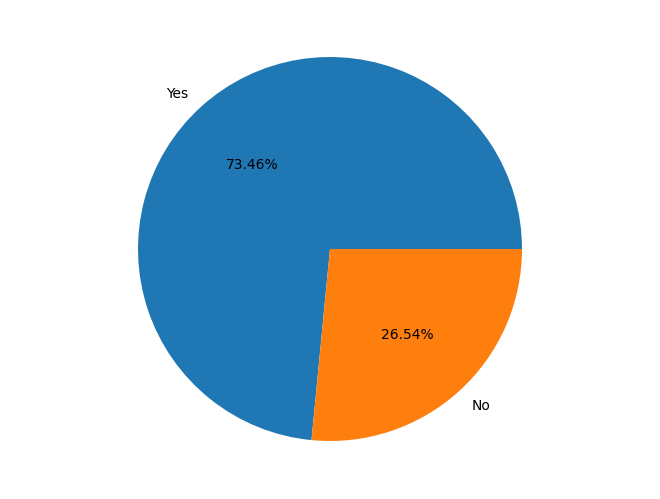

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes', 'No']
Churn = df_load.Churn.value_counts()
ax.pie(Churn, labels = labels, autopct='%1.2f%%')
plt.show()

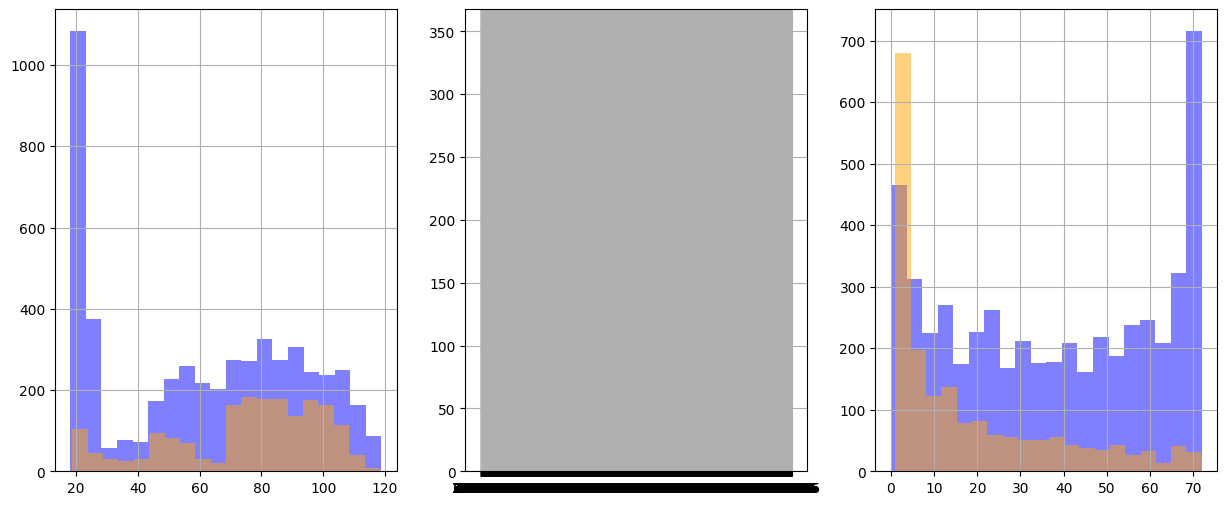

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

for i, feature in enumerate(numerical_features):
    df_load[df_load.Churn == 'No'][feature].hist(bins=20, color='blue', alpha=0.5, ax=ax[i])
    df_load[df_load.Churn == 'Yes'][feature].hist(bins=20, color='orange', alpha=0.5, ax=ax[i])

plt.show()

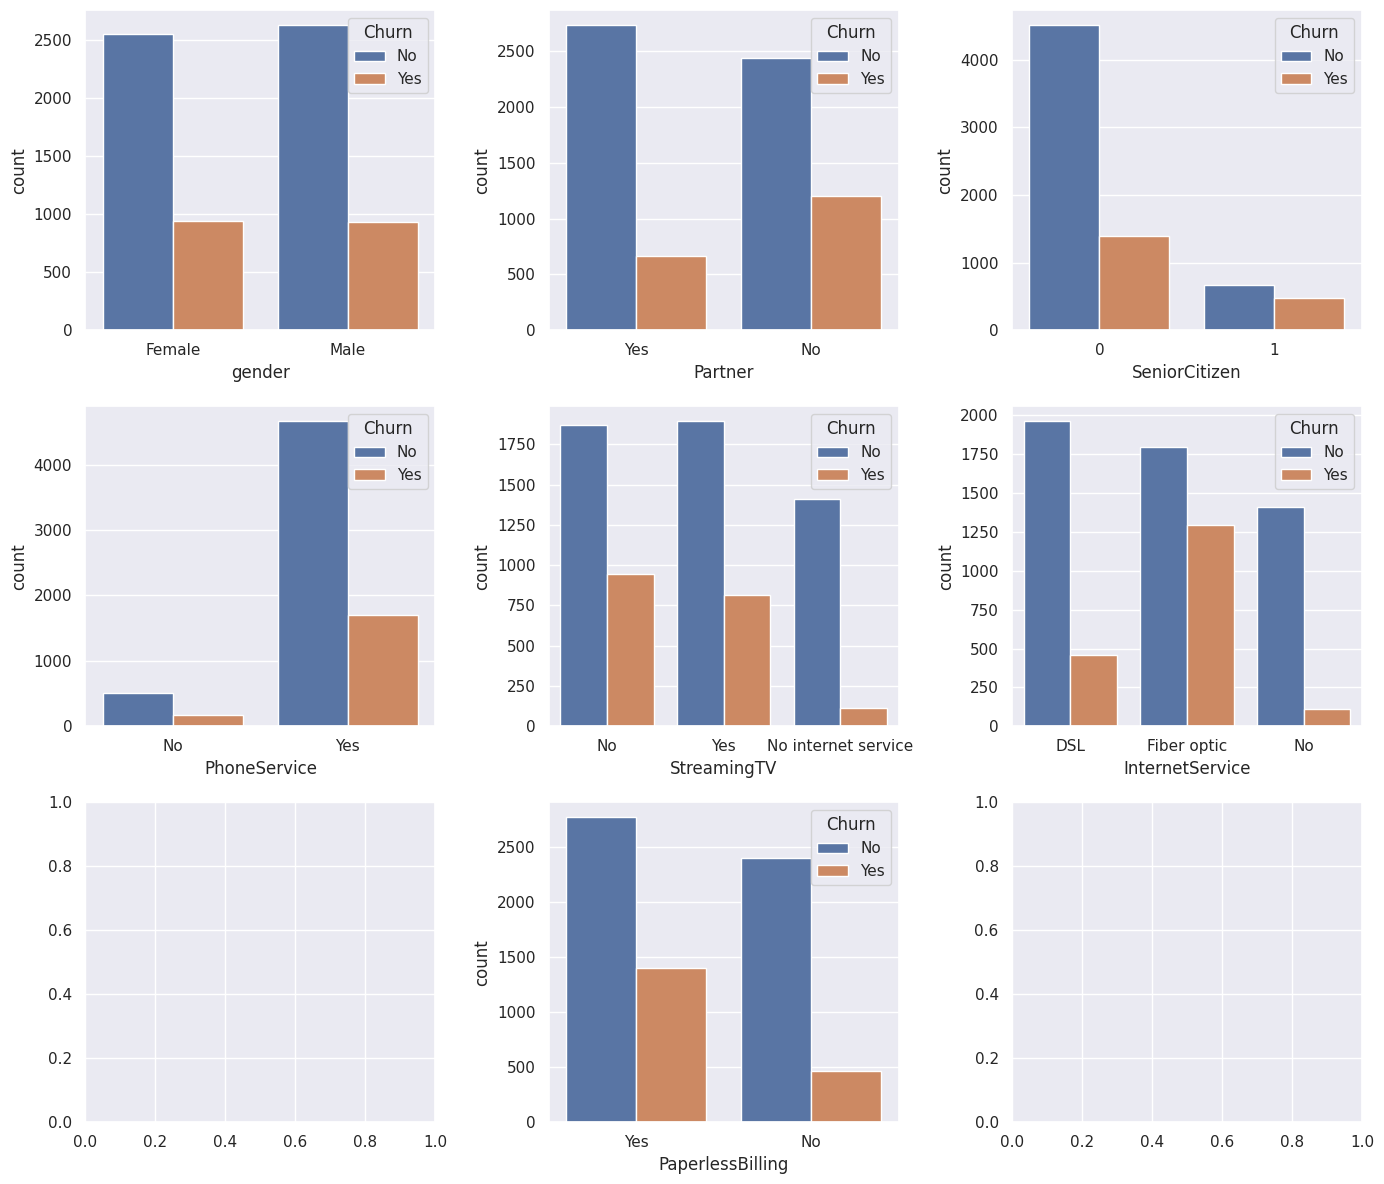

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0, 0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0, 1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0, 2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1, 0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1, 1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1, 2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2, 1])
plt.tight_layout()
plt.show()

In [ ]:
cleaned_df = df_load.drop(['customerID'], axis=1)
print(cleaned_df.head)

<bound method NDFrame.head of       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL         

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number:
        continue
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
    print(cleaned_df.describe())

<ipython-input-25-44aab58399e6>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:
<ipython-input-25-44aab58399e6>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:
<ipython-input-25-44aab58399e6>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:
<ipython-input-25-44aab58399e6>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:
<ipython-input-25-44aab58399e6>:3: DeprecationWarning: Converting `np.inexact` or `n

            gender  SeniorCitizen       tenure  MonthlyCharges
count  7043.000000    7043.000000  7043.000000     7043.000000
mean      0.504756       0.162147    32.371149       64.761692
std       0.500013       0.368612    24.559481       30.090047
min       0.000000       0.000000     0.000000       18.250000
25%       0.000000       0.000000     9.000000       35.500000
50%       1.000000       0.000000    29.000000       70.350000
75%       1.000000       0.000000    55.000000       89.850000
max       1.000000       1.000000    72.000000      118.750000
            gender  SeniorCitizen       tenure  MonthlyCharges
count  7043.000000    7043.000000  7043.000000     7043.000000
mean      0.504756       0.162147    32.371149       64.761692
std       0.500013       0.368612    24.559481       30.090047
min       0.000000       0.000000     0.000000       18.250000
25%       0.000000       0.000000     9.000000       35.500000
50%       1.000000       0.000000    29.000000       70

<ipython-input-25-44aab58399e6>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:
<ipython-input-25-44aab58399e6>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:
<ipython-input-25-44aab58399e6>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:
<ipython-input-25-44aab58399e6>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:
<ipython-input-25-44aab58399e6>:3: DeprecationWarning: Converting `np.inexact` or `n

            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.504756       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7043.000000    7043.000000      7043.000000     7043.000000   
mean       0.903166       0.940508         0.872923        0.790004   
std        0.295752       0.948554         0.737796        0.859848   
min        0.000000       0.000

<ipython-input-25-44aab58399e6>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:


In [ ]:
from sklearn.model_selection import train_test_split

X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape, ',sedangkan Jumlah baris dan kolom dari y_train adalah: ', y_train.shape)
print('Presentase Churn di data training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape, ',sedangkan Jumlah baris dan kolom dari y_test adalah: ', y_test.shape)
print('Presentase Churn di data testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4930, 19) ,sedangkan Jumlah baris dan kolom dari y_train adalah:  (4930,)
Presentase Churn di data training adalah:
Churn
0    0.737323
1    0.262677
Name: proportion, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2113, 19) ,sedangkan Jumlah baris dan kolom dari y_test adalah:  (2113,)
Presentase Churn di data testing adalah:
Churn
0    0.728348
1    0.271652
Name: proportion, dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression().fit(x_train, y_train)
print('Model Logistic Regression yang terbentuk adalah: \n', log_model)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
